In [ ]:
!pip install deepmol[machine-learning]

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.6/533.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

Restart session and do not run the previous cell again

In [ ]:
!wget -O bioavailability.csv --no-check-certificate "https://docs.google.com/uc?export=download&id=1iyxYyOl-tg0i62mHiS3cpsSwbeU86BBl"

--2025-03-30 12:27:13--  https://docs.google.com/uc?export=download&id=1iyxYyOl-tg0i62mHiS3cpsSwbeU86BBl
Resolving docs.google.com (docs.google.com)... 173.194.210.113, 173.194.210.139, 173.194.210.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.210.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1iyxYyOl-tg0i62mHiS3cpsSwbeU86BBl&export=download [following]
--2025-03-30 12:27:13--  https://drive.usercontent.google.com/download?id=1iyxYyOl-tg0i62mHiS3cpsSwbeU86BBl&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41096 (40K) [application/octet-stream]
Saving to: ‘bioavailability.csv’

bioavailability.csv 100%[===================>]  40.13K  --.-KB/

In [ ]:
import pandas as pd

pd.read_csv("bioavailability.csv")

,Drug_ID,Drug,Y
0,Dimercaprol,OCC(S)CS,0
1,Edrophonium,CC[N+](C)(C)c1cccc(O)c1,0
2,Carbimazole,CCOC(=O)n1ccn(C)c1=S,0
3,Vidarabine,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@@H]1O,0
4,Cefacetrile,CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)CC#N)[...,0
...,...,...,...
635,Cyclopenthiazide,NS(=O)(=O)c1cc2c(cc1Cl)NC(CC1CCCC1)NS2(=O)=O,1
636,Sulfinpyrazone,O=C1C(CCS(=O)c2ccccc2)C(=O)N(c2ccccc2)N1c1ccccc1,1
637,Toremifene,CN(C)CCOc1ccc(/C(=C(/CCCl)c2ccccc2)c2ccccc2)cc1,1
638,Tamsulosin,CCOc1ccccc1OCCN[C@H](C)Cc1ccc(OC)c(S(N)(=O)=O)c1,1


# Pre-process the Raw Data

Read the data with pandas and check how many rows (datapoints) the dataset has

In [ ]:
# prompt: Read the data with pandas and check how many rows (datapoints) the dataset has

import pandas as pd
df = pd.read_csv("bioavailability.csv")
print(len(df))


640


Check how many bioavailable molecules you have in the dataset

In [ ]:
# prompt: Can you check how many bioavailable molecules there are in the dataset? They are the ones with 1 in the Y column

bioavailable_count = len(df[df['Y'] == 1])
print(f"Number of bioavailable molecules: {bioavailable_count}")


Number of bioavailable molecules: 492


Remove all the invalid molecules (molecules than cannot be read by rdkit) and drop them

In [ ]:
# prompt: Remove all the invalid molecules (molecules than cannot be read by rdkit) and drop them

from rdkit import Chem

# ... (previous code)

def is_valid_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

df = df[df['Drug'].apply(is_valid_mol)]
print(len(df))

bioavailable_count = len(df[df['Y'] == 1])
print(f"Number of bioavailable molecules: {bioavailable_count}")


640
Number of bioavailable molecules: 492


# Split the data

Use sklearn to obtain a stratified split of the data, generating one train, validation and test sets with ratios of 5:2:3

In [ ]:
# prompt: Use sklearn to obtain a stratified split of the data, generating one train, validation and test sets with ratios of 5:2:3

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'Y' is your target column
train_df, temp_df = train_test_split(df, test_size=0.5, stratify=df['Y'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.6, stratify=temp_df['Y'], random_state=42) # 0.6 of 0.5 is 0.3, so test is 30%

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")


Train size: 320
Validation size: 128
Test size: 192


In [ ]:
train_df

,Drug_ID,Drug,Y
437,Methylprednisolone,C[C@H]1C[C@H]2[C@@H]3CC[C@](O)(C(=O)CO)[C@@]3(...,1
610,Naratriptan,CNS(=O)(=O)CCc1ccc2[nH]cc(C3CCN(C)CC3)c2c1,1
337,Ampicillin,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,1
408,Zopiclone,CN1CCN(C(=O)OC2c3nccnc3C(=O)N2c2ccc(Cl)cn2)CC1,1
331,Bepridil,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,1
...,...,...,...
268,Penicillamine,CC(C)(S)[C@@H](N)C(=O)O,1
397,Urapidil,COc1ccccc1N1CCN(CCCNc2cc(=O)n(C)c(=O)n2C)CC1,1
142,Tacrolimus,C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...,1
328,Ziprasidone,O=C1Cc2cc(CCN3CCN(c4nsc5ccccc45)CC3)c(Cl)cc2N1,1


Concatenate X and y and export to a CSV file

In [ ]:
# prompt: Concatenate X and y and export to a CSV file

# Concatenate X and y for each DataFrame and export to CSV
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)


# Generate features

Generate morgan fingerprints using the SMILES string of each compound and rdkit package

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# Function to generate Morgan fingerprints as an array of features
def generate_morgan_fingerprints(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
        return np.array(fp)
    else:
        return None

# Apply the function to the DataFrame
train_df['Morgan_Fingerprints'] = train_df['Drug'].apply(generate_morgan_fingerprints)

# Convert the list of fingerprints to a 2D NumPy array
X_train = np.vstack(train_df['Morgan_Fingerprints'].values)
y_train = train_df["Y"]

# Apply the function to the DataFrame
test_df['Morgan_Fingerprints'] = test_df['Drug'].apply(generate_morgan_fingerprints)

# Convert the list of fingerprints to a 2D NumPy array
X_test = np.vstack(test_df['Morgan_Fingerprints'].values)
y_test = test_df["Y"]

# Apply the function to the DataFrame
val_df['Morgan_Fingerprints'] = val_df['Drug'].apply(generate_morgan_fingerprints)

# Convert the list of fingerprints to a 2D NumPy array
X_val = np.vstack(val_df['Morgan_Fingerprints'].values)
y_val = val_df["Y"]

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

Create new variables to generate all the 0D, 1D and 2D descriptors using the SMILES string of each compound and rdkit package

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# List of descriptors to calculate
descriptor_names = [name for name, _ in Descriptors._descList]

# Function to calculate descriptors
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
        descriptors = calculator.CalcDescriptors(mol)
        return descriptors
    else:
        return [None] * len(descriptor_names)

# Apply the function to the DataFrame
df_descriptors = pd.DataFrame(train_df['Drug'].apply(calculate_descriptors).tolist(), columns=descriptor_names)

# Convert the DataFrame to a NumPy array, dropping any rows with NaN values
X_train_descriptors = df_descriptors.to_numpy()

# Display the feature array
X_train_descriptors


array([[1.24147305e+01, 1.24147305e+01, 6.20054161e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.16093165e+01, 1.16093165e+01, 1.27962440e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.23341730e+01, 1.23341730e+01, 3.74515411e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.43050866e+01, 1.43050866e+01, 9.88189785e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.15663361e+01, 1.15663361e+01, 4.99095480e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.21761042e+01, 1.21761042e+01, 5.35193584e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# Apply the function to the DataFrame
df_descriptors = pd.DataFrame(test_df['Drug'].apply(calculate_descriptors).tolist(), columns=descriptor_names)

# Convert the DataFrame to a NumPy array, dropping any rows with NaN values
X_test_descriptors = df_descriptors.to_numpy()

# Display the feature array
X_test_descriptors

array([[12.00867903, 12.00867903,  0.19571688, ...,  0.        ,
         0.        ,  0.        ],
       [12.56453068, 12.56453068,  0.20334562, ...,  0.        ,
         0.        ,  0.        ],
       [10.37248662, 10.37248662,  0.08827339, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [10.04255433, 10.04255433,  0.01660176, ...,  0.        ,
         0.        ,  0.        ],
       [ 9.24712963,  9.24712963,  0.52724537, ...,  0.        ,
         0.        ,  0.        ],
       [11.77454152, 11.77454152,  0.393232  , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# Apply the function to the DataFrame
df_descriptors = pd.DataFrame(val_df['Drug'].apply(calculate_descriptors).tolist(), columns=descriptor_names)

# Convert the DataFrame to a NumPy array, dropping any rows with NaN values
X_val_descriptors = df_descriptors.to_numpy()

# Display the feature array
X_val_descriptors

array([[ 6.3850657 ,  6.3850657 ,  0.43819004, ...,  0.        ,
         0.        ,  0.        ],
       [10.92966356, 10.92966356,  0.02896719, ...,  0.        ,
         0.        ,  0.        ],
       [12.16735002, 12.16735002,  0.06400099, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [12.04003379, 12.04003379,  0.03522198, ...,  0.        ,
         0.        ,  1.        ],
       [11.21475476, 11.21475476,  0.50875555, ...,  0.        ,
         3.        ,  0.        ],
       [ 9.26191043,  9.26191043,  0.3399537 , ...,  0.        ,
         0.        ,  0.        ]])

# Select features

Use the variance threshold feature selector from sklearn to select the features with higher variances

In [ ]:
# prompt: Use the variance threshold feature selector from sklearn to select the features with higher variances from X_train, X_val and X_test

from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold with a threshold (e.g., 0.1)
selector = VarianceThreshold(threshold=0.1)

# Fit the selector on the training data and transform the training, validation, and test data
X_train_descriptors_selected = selector.fit_transform(X_train_descriptors)
X_val_descriptors_selected = selector.transform(X_val_descriptors)
X_test_descriptors_selected = selector.transform(X_test_descriptors)

print(X_train_descriptors_selected.shape)
print(X_val_descriptors_selected.shape)
X_test_descriptors_selected.shape


(320, 145)
(128, 145)


(192, 145)

In [ ]:
# prompt: Use the variance threshold feature selector from sklearn to select the features with higher variances from X_train, X_val and X_test

from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold with a threshold (e.g., 0.1)
selector = VarianceThreshold(threshold=0.1)

# Fit the selector on the training data and transform the training, validation, and test data
X_train_fp_selected = selector.fit_transform(X_train)
X_val_fp_selected = selector.transform(X_val)
X_test_fp_selected = selector.transform(X_test)

print(X_train_fp_selected.shape)
print(X_val_fp_selected.shape)
X_test_fp_selected.shape


(320, 48)
(128, 48)


(192, 48)

# Train models

Train and optimize a random forest using sklearn's random search class with both features

In [ ]:
# prompt: Train and optimize a random forest using sklearn's random search class with both features

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution for Random Search
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None] + list(randint(10, 100).rvs(10)),  # Include None for no max_depth
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': uniform(0.1, 0.9),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Use an appropriate scoring metric
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1
)

# Fit the model to the combined training data
random_search.fit(X_train_fp_selected, y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 28, 'max_features': 0.1585464336867516, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 291}
Best score: 0.775


In [ ]:
# Evaluate the best model on the test set
best_rf = random_search.best_estimator_
test_accuracy_rf_fp = best_rf.score(X_test_fp_selected, y_test)
print(f"Test Accuracy of best model: {test_accuracy_rf_fp}")

Test Accuracy of best model: 0.7916666666666666


In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Use an appropriate scoring metric
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1
)

# Fit the model to the combined training data
random_search.fit(X_train_descriptors_selected, y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 25, 'max_features': 0.28714749658136995, 'min_samples_leaf': 4, 'min_samples_split': 19, 'n_estimators': 267}
Best score: 0.803125


In [ ]:
# Evaluate the best model on the test set
best_rf_descriptors = random_search.best_estimator_
test_accuracy_descriptors_rf = best_rf_descriptors.score(X_test_descriptors_selected, y_test)
print(f"Test Accuracy of best model: {test_accuracy_descriptors_rf}")

Test Accuracy of best model: 0.7916666666666666


Train and optimize a logistic regression using sklearn with both features

In [ ]:
# prompt: Train and optimize a logistic regression using sklearn's Randomized search with both features

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'C': uniform(0.001, 10),  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] # Solvers that support both penalties
}

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=100, random_state=42) # Increase max_iter if needed

# Initialize RandomizedSearchCV for Logistic Regression with combined features
random_search_logreg_fp = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled
    cv=5,  # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # Use all cores
    random_state=42,
    verbose=1
)


# Fit the model on morgan fingerprints
random_search_logreg_fp.fit(X_train_fp_selected, y_train)

print("Best hyperparameters (Morgan Fingerprints):", random_search_logreg_fp.best_params_)
print("Best score (Morgan Fingerprints):", random_search_logreg_fp.best_score_)

# Evaluate on the test set
best_logreg_fp = random_search_logreg_fp.best_estimator_
test_accuracy_logreg_fp = best_logreg_fp.score(X_test_fp_selected, y_test)
print(f"Test Accuracy (Morgan Fingerprints): {test_accuracy_logreg_fp}")

Compare models' performance using the accuracy metric on the test set

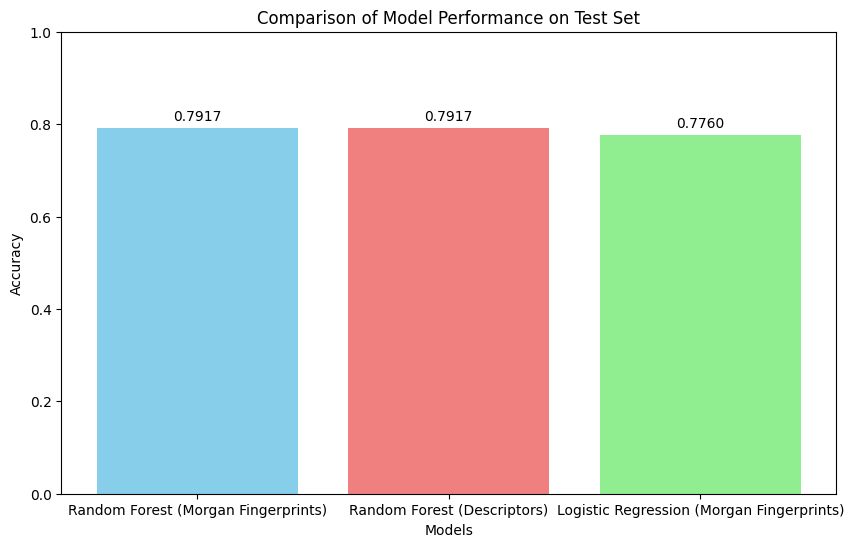

In [ ]:
# prompt: Compare models' performance using the accuracy metric on the test set using a bar plot highlighting the differences between different models

import matplotlib.pyplot as plt

# Accuracy scores (replace with your actual scores)
models = ['Random Forest (Morgan Fingerprints)', 'Random Forest (Descriptors)', 'Logistic Regression (Morgan Fingerprints)']
accuracy_scores = [test_accuracy_rf_fp, test_accuracy_descriptors_rf, test_accuracy_logreg_fp]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Performance on Test Set")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Add value labels on top of each bar
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')

plt.show()


# Alternatively, all the previous steps with DeepMol

In [ ]:
from deepmol.loaders import CSVLoader

from deepmol.pipeline import Pipeline
from deepmol.compound_featurization import MorganFingerprint
from deepmol.feature_selection import LowVarianceFS
from deepmol.metrics import Metric
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier


# LOAD THE DATA
loader = CSVLoader('train.csv',
                   smiles_field='Drug',
                   labels_fields=['Y'],
                   mode='classification')
train_dataset = loader.create_dataset(sep=",")


steps = [
         ('morgan fingerprints', MorganFingerprint(radius=2, size=1024)),
         ('low variance feature selection', LowVarianceFS(threshold=0.1)),
         ]

from deepmol.parameter_optimization import HyperparameterOptimizerCV

# Define the parameter distribution for Random Search
param_dist = {
    'n_estimators': randint(50, 500).rvs(10),
    'max_depth': [None] + list(randint(10, 100).rvs(10)),  # Include None for no max_depth
    'min_samples_split': randint(2, 20).rvs(10),
    'min_samples_leaf': randint(1, 20).rvs(10),
    'max_features': uniform(0.1, 0.9).rvs(10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
optimizer = HyperparameterOptimizerCV(RandomForestClassifier, metric=Metric(accuracy_score),
                                          maximize_metric=True,
                                          cv=5,
                                          n_iter_search=10,
                                          params_dict=param_dist,
                                          model_type="sklearn")
pipeline = Pipeline(steps=steps, path="oral_bioavailability_deepmol", hpo=optimizer)
pipeline.fit(train_dataset)



MorganFingerprint: 100%|██████████| 320/320 [00:00<00:00, 511.80it/s]
INFO:deepmol.log:MODEL TYPE: sklearn
INFO:deepmol.log:Fitting 10 random models from a space of 440000 possible models.
INFO:deepmol.log:
 
 Best <function accuracy_score at 0x7aa7b7565120>: 0.781250 using {'n_estimators': 291, 'min_samples_split': 14, 'min_samples_leaf': 7, 'max_features': 0.291033313095595, 'max_depth': 59, 'criterion': 'gini', 'bootstrap': False}
INFO:deepmol.log:
 <function accuracy_score at 0x7aa7b7565120>: 0.762500 (0.040020) with: {'n_estimators': 245, 'min_samples_split': 8, 'min_samples_leaf': 11, 'max_features': 0.7763174175233486, 'max_depth': 93, 'criterion': 'gini', 'bootstrap': False} 

INFO:deepmol.log:
 <function accuracy_score at 0x7aa7b7565120>: 0.781250 (0.040745) with: {'n_estimators': 291, 'min_samples_split': 14, 'min_samples_leaf': 7, 'max_features': 0.291033313095595, 'max_depth': 59, 'criterion': 'gini', 'bootstrap': False} 

INFO:deepmol.log:
 <function accuracy_score at 0x7a

In [ ]:
loader = CSVLoader('test.csv',
                   smiles_field='Drug',
                   labels_fields=['Y'],
                   mode='classification')
test_dataset = loader.create_dataset(sep=",")

predictions = pipeline.predict(test_dataset)
accuracy_rf_fp_deepmol = accuracy_score(test_dataset.y, predictions)
accuracy_rf_fp_deepmol

MorganFingerprint: 100%|██████████| 192/192 [00:00<00:00, 1147.48it/s]


0.7916666666666666

In [ ]:
pipeline.save()

Using descriptors now

In [ ]:
from deepmol.loaders import CSVLoader
from deepmol.pipeline import Pipeline
from deepmol.compound_featurization import TwoDimensionDescriptors
from deepmol.feature_selection import LowVarianceFS
from deepmol.metrics import Metric
from sklearn.metrics import accuracy_score


# LOAD THE DATA
loader = CSVLoader('train.csv',
                   smiles_field='Drug',
                   labels_fields=['Y'],
                   mode='classification')
train_dataset = loader.create_dataset(sep=",")


steps = [
         ('descriptors', TwoDimensionDescriptors()),
         ('low variance feature selection', LowVarianceFS()),
         ]

from deepmol.parameter_optimization import HyperparameterOptimizerCV

optimizer = HyperparameterOptimizerCV(RandomForestClassifier, metric=Metric(accuracy_score),
                                          maximize_metric=True,
                                          cv=5,
                                          n_iter_search=10,
                                          params_dict=param_dist,
                                          model_type="sklearn")
pipeline_descriptors = Pipeline(steps=steps, path="oral_bioavailability_descriptors",
                                hpo=optimizer)
pipeline_descriptors.fit(train_dataset)



TwoDimensionDescriptors:  25%|██▌       | 81/320 [00:01<00:03, 60.08it/s]ERROR:deepmol.log:Failed to featurize CCP(CC)(CC)=[Au]S[C@@H]1O[C@H](COC(C)=O)[C@@H](OC(C)=O)[C@H](OC(C)=O)[C@H]1OC(C)=O. Appending empty array
ERROR:deepmol.log:Exception message: 
TwoDimensionDescriptors: 100%|██████████| 320/320 [00:06<00:00, 47.89it/s]
INFO:deepmol.log:MODEL TYPE: sklearn
INFO:deepmol.log:Fitting 10 random models from a space of 440000 possible models.
INFO:deepmol.log:
 
 Best <function accuracy_score at 0x7aa7b7565120>: 0.799355 using {'n_estimators': 291, 'min_samples_split': 14, 'min_samples_leaf': 7, 'max_features': 0.291033313095595, 'max_depth': 59, 'criterion': 'gini', 'bootstrap': False}
INFO:deepmol.log:
 <function accuracy_score at 0x7aa7b7565120>: 0.764881 (0.053238) with: {'n_estimators': 245, 'min_samples_split': 8, 'min_samples_leaf': 11, 'max_features': 0.7763174175233486, 'max_depth': 93, 'criterion': 'gini', 'bootstrap': False} 

INFO:deepmol.log:
 <function accuracy_score at

In [ ]:
loader = CSVLoader('test.csv',
                   smiles_field='Drug',
                   labels_fields=['Y'],
                   mode='classification')
test_dataset = loader.create_dataset(sep=",")

predictions = pipeline_descriptors.predict(test_dataset)
accuracy_descriptors_deepmol = accuracy_score(test_dataset.y, predictions)
accuracy_descriptors_deepmol

TwoDimensionDescriptors: 100%|██████████| 192/192 [00:03<00:00, 60.08it/s]


0.78125

# Now use DeepMol AutoML and compare with your models

In [ ]:
from deepmol.loaders import CSVLoader
from deepmol.metrics import Metric
from deepmol.pipeline_optimization import PipelineOptimization
from deepmol.splitters import RandomSplitter
from sklearn.metrics import accuracy_score
import optuna

# LOAD THE DATA
loader = CSVLoader('train.csv',
                   smiles_field='Drug',
                   labels_fields=['Y'],
                   mode='classification')
train_dataset = loader.create_dataset(sep=",")

loader = CSVLoader('val.csv',
                   smiles_field='Drug',
                   labels_fields=['Y'],
                   mode='classification')
validation_dataset = loader.create_dataset(sep=",")

# OPTIMIZE THE PIPELINE
po = PipelineOptimization(direction='maximize', study_name='oral_bioavailability', sampler=optuna.samplers.TPESampler(seed=42),
                          storage='sqlite:///my_experience.db')
metric = Metric(accuracy_score)
po.optimize(train_dataset=train_dataset, test_dataset=validation_dataset, objective_steps='sklearn',
            metric=metric, n_trials=10, data=train_dataset, save_top_n=2, trial_timeout=60)

In [ ]:
# LOAD THE DATA
loader = CSVLoader('test.csv',
                   smiles_field='Drug',
                   labels_fields=['Y'],
                   mode='classification')
test_dataset = loader.create_dataset(sep=",")

predictions = po.best_pipeline.predict(test_dataset)

accuracy_score(test_dataset.y, predictions)

NPClassifierFP:   0%|          | 0/192 [00:00<?, ?it/s]


0.7291666666666666

# Choose one of the models and make predictions for a larger dataset

In [ ]:
!wget -O coconut_dataset.csv --no-check-certificate "https://docs.google.com/uc?export=download&id=1csWReIE49fUdLrv7LHYFE7AUrxIJ9EAs"

--2025-03-30 12:33:43--  https://docs.google.com/uc?export=download&id=1csWReIE49fUdLrv7LHYFE7AUrxIJ9EAs
Resolving docs.google.com (docs.google.com)... 173.194.210.138, 173.194.210.101, 173.194.210.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.210.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1csWReIE49fUdLrv7LHYFE7AUrxIJ9EAs&export=download [following]
--2025-03-30 12:33:43--  https://drive.usercontent.google.com/download?id=1csWReIE49fUdLrv7LHYFE7AUrxIJ9EAs&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15976313 (15M) [application/octet-stream]
Saving to: ‘coconut_dataset.csv’

coconut_dataset.csv 100%[===================>]  15.24M  56.4

In [ ]:
import pandas as pd

coconut_dataset = pd.read_csv("coconut_dataset.csv")
coconut_dataset

,id,identifier,canonical_smiles,standard_inchi,standard_inchi_key,name,iupac_name,annotation_level,total_atom_count,heavy_atom_count,...,murcko_framework,np_likeness,chemical_class,chemical_sub_class,chemical_super_class,direct_parent_classification,np_classifier_pathway,np_classifier_superclass,np_classifier_class,np_classifier_is_glycoside
0,675225,CNP0194087.3,C=C1C(=O)O[C@@H]2[C@H]3C(C)=C(O)C(=O)[C@H]3[C@...,"InChI=1S/C20H24O7/c1-6-8(2)18(23)26-11-7-20(5,...",PTQURJSSVZYXNH-QICRIBIQSA-N,NaN,"[(3~{a}~{R},4~{R},6~{R},6~{a}~{R},9~{a}~{R},9~...",2,51,27,...,O1CCC2CCCC3CC=CC3C12,2.99,Prenol lipids,Terpene lactones,Lipids and lipid-like molecules,Guaianolides and derivatives,Terpenoids,Sesquiterpenoids,Guaiane sesquiterpenoids,False
1,19839,CNP0077749.0,C=NN1OC=C2N=CC=C21,InChI=1S/C6H5N3O/c1-7-9-6-2-3-8-5(6)4-10-9/h2-...,BGHWULUNNVIRCL-UHFFFAOYSA-N,NaN,"~{N}-pyrrolo[3,2-c]isoxazol-1-ylmethanimine",1,15,10,...,N1=CC=C2NOC=C12,-0.58,Azoles,Isoxazoles,Organoheterocyclic compounds,Isoxazoles,Alkaloids,NaN,NaN,False
2,200427,CNP0299490.1,COCCCNC(=O)C1=CC=CC=C1N1C(=O)N2CCC3=C(NC4=CC=C...,InChI=1S/C26H28N4O5/c1-26-22-17(19-15-16(35-3)...,XDZXPZIASBYJFE-SANMLTNESA-N,STL537573,"2-[(2~{S})-12-methoxy-2-methyl-3,5-dioxo-4,6,1...",2,63,35,...,c1ccc(cc1)N2CN3CCc4c5ccccc5[nH]c4C3C2,-0.64,Indoles and derivatives,Pyridoindoles,Organoheterocyclic compounds,Beta carbolines,Alkaloids,Tryptophan alkaloids,Carboline alkaloids,False
3,209956,CNP0387685.0,COC1=CC=C(OC)C(C=C2OC3=CC(OCC(=O)N4CCC(C(=O)O)...,InChI=1S/C25H25NO8/c1-31-17-4-6-20(32-2)16(11-...,LRPGQHXRHMSCMB-UHFFFAOYSA-N,NaN,"1-[2-[2-[(2,5-dimethoxyphenyl)methylene]-3-oxo...",2,59,34,...,O1c2cc(OCCN3CCCCC3)ccc2CC1=Cc4ccccc4,-0.76,Aurone flavonoids,Aurone flavonoids,Phenylpropanoids and polyketides,Aurone flavonoids,NaN,NaN,NaN,False
4,223682,CNP0375958.0,COC1=CC(C2CC(=O)OC3=C2C(=O)N(CCC2=CC=C(O)C=C2)...,InChI=1S/C25H25NO7/c1-14-10-19-23(25(30)26(14)...,RTTYADRUJGDRJY-UHFFFAOYSA-N,STL544873,"4-(4-hydroxy-3,5-dimethoxy-phenyl)-6-[2-(4-hyd...",3,58,33,...,O1C=2C=CN(CC2C(c3ccccc3)CC1)CCc4ccccc4,0.11,Pyranopyridines,Pyranopyridines,Organoheterocyclic compounds,Pyranopyridines,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,210642,CNP0387086.0,COC1=CC=CC=C1N1C(=O)NC(O)=C(C2NCCC3=C2NC2=CC=C...,InChI=1S/C22H20N4O4/c1-30-16-9-5-4-8-15(16)26-...,HSPFURMAJHHXPC-UHFFFAOYSA-N,"6-hydroxy-3-(2-methoxyphenyl)-5-(2,3,4,9-tetra...","6-hydroxy-3-(2-methoxyphenyl)-5-(2,3,4,9-tetra...",1,50,30,...,c1ccc(cc1)N2CNC=C(C2)C3NCCc4c5ccccc5[nH]c43,-0.23,Harmala alkaloids,Harmala alkaloids,Alkaloids and derivatives,Harmala alkaloids,Alkaloids,Tryptophan alkaloids,Carboline alkaloids,False
19995,210670,CNP0387128.1,COC1=CC=CC=C1CN1C(=O)[C@@H]2C(C(C)O)NC3(C(=O)N...,InChI=1S/C23H23N3O5/c1-12(27)19-17-18(23(25-19...,KFVSZFOJGLIEBA-KLFHCSGLSA-N,STL531072,"(3~{a}~{R},6~{a}~{S})-1-(1-hydroxyethyl)-5-[(2...",2,54,31,...,c1ccc(cc1)CN2CC3CNC4(c5ccccc5NC4)C3C2,-0.27,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Alpha amino acids,Alkaloids,Tryptophan alkaloids,Simple oxindole alkaloids,False
19996,210694,CNP0141924.0,O=C1C=C(C2=CC=CC=C2)C2=C(O)C=C(O)C=C2O1,InChI=1S/C15H10O4/c16-10-6-12(17)15-11(9-4-2-1...,HUQKUJNSVHEHIH-UHFFFAOYSA-N,7758-73-8,"5,7-dihydroxy-4-phenyl-chromen-2-one",3,29,19,...,O1c2ccccc2C(=CC1)c3ccccc3,0.92,Neoflavonoids,Neoflavones,Phenylpropanoids and polyketides,Neoflavones,Shikimates and Phenylpropanoids,Flavonoids,Neoflavonoids,False
19997,210762,CNP0230430.0,CC(=O)COC1=CC=C2C(=O)C(=CC3=CC=C4OCOC4=C3)OC2=C1,InChI=1S/C19H14O6/c1-11(20)9-22-13-3-4-14-16(8...,DUOJKHPJQQSIOJ-UHFFFAOYSA-N,NaN,"6-acetonyloxy-2-(1,3-benzodioxol-5-ylmethylene...",1,39,25,...,O1c2ccccc2CC1=Cc3ccc4OCOc4c3,-0.22,Aurone flavonoids,Aurone flavonoids,Phenylpropanoids and polyketides,Aurone flavonoids,Shikimates and Phenylpropanoids,Flavonoids,Aurones,False


In [ ]:
# LOAD THE DATA
loader = CSVLoader('coconut_dataset.csv',
                   smiles_field='canonical_smiles')
coconut_dataset_deepmol_dataset = loader.create_dataset(sep=",")

Let's use the deepmol pipeline just because it's more compact to make predictions

In [ ]:
pipeline = Pipeline.load("oral_bioavailability_deepmol")

predictions = pipeline.predict(coconut_dataset_deepmol_dataset, return_invalid=True)

MorganFingerprint: 100%|██████████| 19999/19999 [00:18<00:00, 1063.21it/s]


In [ ]:
# prompt: create a new dataframe with the predictions and ids of the molecule

import pandas as pd

# Assuming 'predictions' and 'test_df' are defined from the previous code
# Create a DataFrame with predictions and IDs
results_df = pd.DataFrame({'MoleculeID': coconut_dataset['identifier'],
                           "smiles": coconut_dataset['canonical_smiles'],
                           'Prediction': predictions})

# Display the DataFrame
results_df


,MoleculeID,smiles,Prediction
0,CNP0194087.3,C=C1C(=O)O[C@@H]2[C@H]3C(C)=C(O)C(=O)[C@H]3[C@...,1.0
1,CNP0077749.0,C=NN1OC=C2N=CC=C21,1.0
2,CNP0299490.1,COCCCNC(=O)C1=CC=CC=C1N1C(=O)N2CCC3=C(NC4=CC=C...,1.0
3,CNP0387685.0,COC1=CC=C(OC)C(C=C2OC3=CC(OCC(=O)N4CCC(C(=O)O)...,1.0
4,CNP0375958.0,COC1=CC(C2CC(=O)OC3=C2C(=O)N(CCC2=CC=C(O)C=C2)...,1.0
...,...,...,...
19994,CNP0387086.0,COC1=CC=CC=C1N1C(=O)NC(O)=C(C2NCCC3=C2NC2=CC=C...,1.0
19995,CNP0387128.1,COC1=CC=CC=C1CN1C(=O)[C@@H]2C(C(C)O)NC3(C(=O)N...,1.0
19996,CNP0141924.0,O=C1C=C(C2=CC=CC=C2)C2=C(O)C=C(O)C=C2O1,1.0
19997,CNP0230430.0,CC(=O)COC1=CC=C2C(=O)C(=CC3=CC=C4OCOC4=C3)OC2=C1,1.0


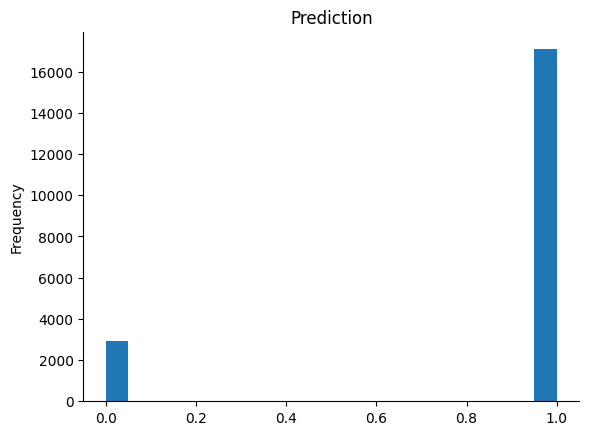

In [ ]:

from matplotlib import pyplot as plt
results_df['Prediction'].plot(kind='hist', bins=20, title='Prediction')
plt.gca().spines[['top', 'right',]].set_visible(False)

Draw molecules that are bioactive

Drawing molecule: CNP0194087.3


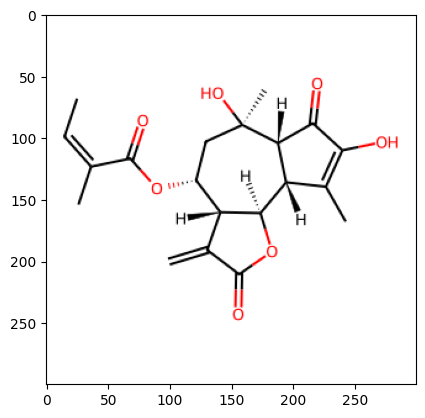

Drawing molecule: CNP0077749.0


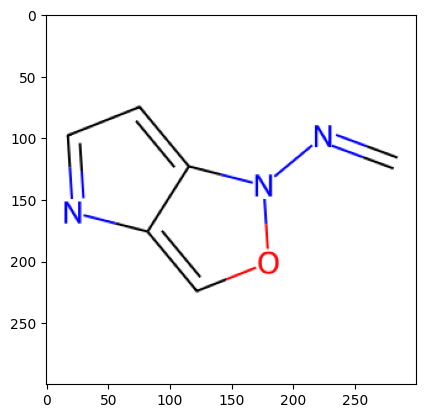

Drawing molecule: CNP0299490.1


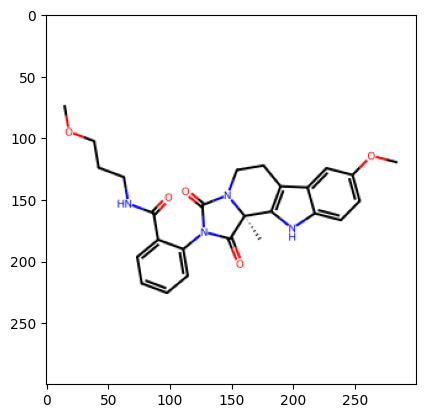

Drawing molecule: CNP0387685.0


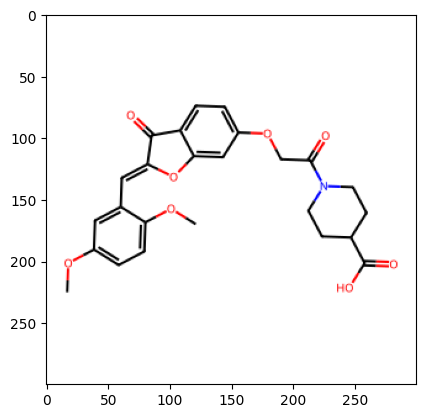

Drawing molecule: CNP0375958.0


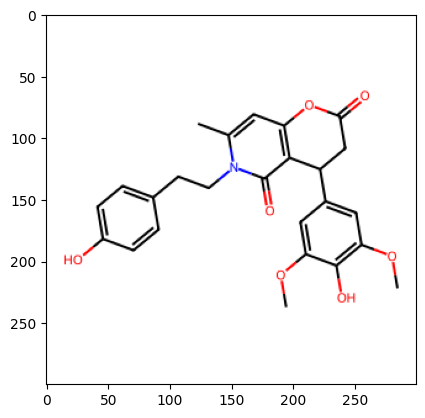

Drawing molecule: CNP0388743.1


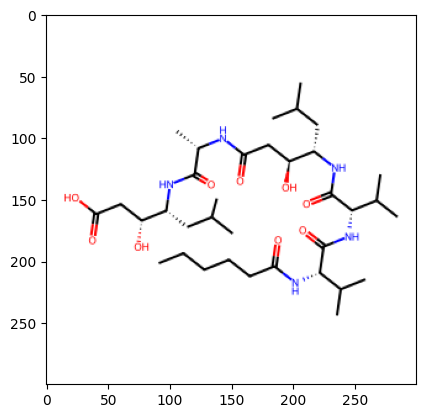

Drawing molecule: CNP0537194.1


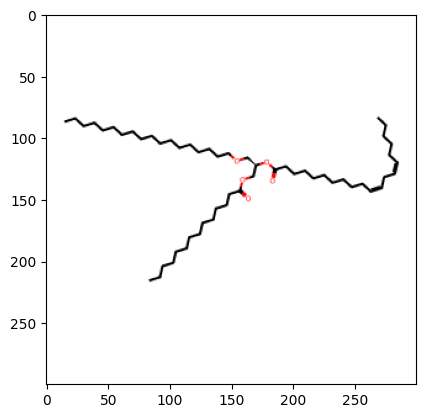

Drawing molecule: CNP0010674.1


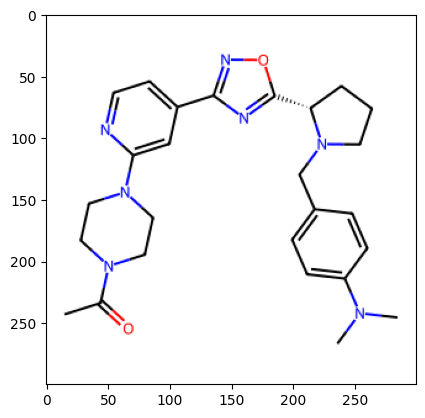

Drawing molecule: CNP0012472.2


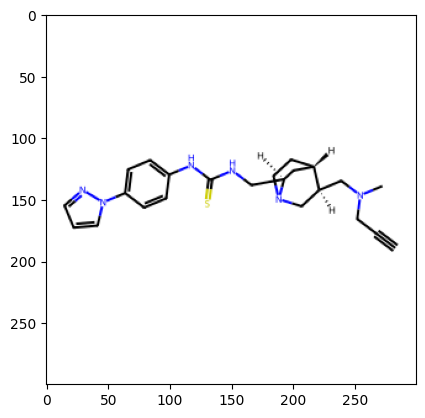

Drawing molecule: CNP0320059.1


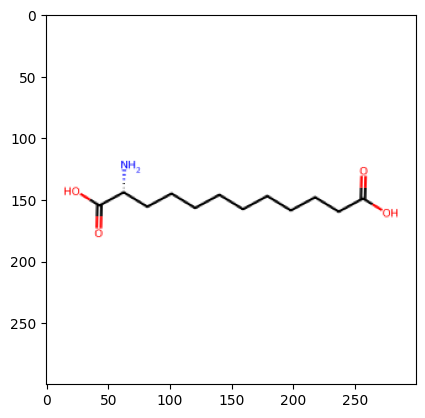

In [ ]:


import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import Draw

# Assuming 'results_df' is defined from the previous code and contains 'Prediction' column

# Filter for non-bioactive molecules (predictions == 0)
non_bioactive_molecules = results_df[results_df['Prediction'] == 1]

# Select the first 10 non-bioactive molecules for visualization (adjust as needed)
molecules_to_draw = non_bioactive_molecules['MoleculeID'].head(10)

# Assuming you have a function called draw_molecule to visualize molecules
#  You'll need to implement or import this function based on your visualization library.
#  Example:
def draw_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        img = Draw.MolToImage(mol)
        plt.imshow(img)
        plt.show()
    else:
        print("Invalid SMILES string")

#Iterate through the chosen molecules and draw them
for molecule_id in molecules_to_draw:
    smiles = results_df.loc[coconut_dataset['identifier'] == molecule_id, 'smiles'].iloc[0] # Assuming the smiles are in the 'smiles' column
    print(f'Drawing molecule: {molecule_id}')
    draw_molecule(smiles)
